# <span style= 'color:blue'>Imports </span>

In [1]:
import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
import cv2 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

import pandas as pd


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from pytesseract import Output
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

# plt.rcParams['figure.figsize'] = (20,12)

In [2]:
PATH_IMG = 'H:\\Interviews\\Masters india assignment\\mlassignmentmastersindia\\'

In [3]:
os.listdir(PATH_IMG)

['1291908241.jpg',
 '19019155.jpg',
 'Decathlon Invoice.jpg',
 'Decathlon Tax Invoice.jpg',
 'IGST NO.333.jpg',
 'IGST NO.334.jpg',
 'Invoice  - 10001.jpg',
 'Invoice - 20004.jpg',
 'Sales_Invoice_1EOU192001343.jpg',
 'Sales_Invoice_1EOU192001344.jpg']

In [4]:
image_paths = [os.path.join(PATH_IMG, x) for x in os.listdir(PATH_IMG)]

In [5]:
bad_image_path = image_paths[2]
good_image_path = image_paths[0]

In [6]:
good_image_path

'H:\\Interviews\\Masters india assignment\\mlassignmentmastersindia\\1291908241.jpg'

# <span style = 'color: blue'> OpenCV </span>

## 2.0 Functions

In [7]:
def read_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_image(image, figsize = (25,15), gray = True):
    plt.figure(figsize=figsize)
    if gray:
        plt.imshow(image, label = 'Original', cmap = 'gray')
    else:
        plt.imshow(image, label = 'Original')
    plt.title('Original')

def display(image):
    dpi = 80
    # image = plt.imread(im_path)

    height, width  = image.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(image, cmap='gray')

    plt.show()


def invert_image(image):
    image = cv2.bitwise_not(image)
    return image


def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def binarization(image, thresh_val = 180, 
            maxval = 240, threshold_type = cv2.THRESH_TOZERO):
    thresh, image_bw = cv2.threshold(
        image, thresh_val, maxval, threshold_type
    )
    return thresh, image_bw


def noise_removal(image, row_shape = 1, col_shape = 1):
    kernel = np.ones((row_shape, col_shape), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    kernel_1 = np.ones((row_shape, col_shape), np.uint8)
    image = cv2.erode(image, kernel_1, iterations= 1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_1)
    image = cv2.medianBlur(image, 3)
    return image


def thin_font(image, row_shape = 1, col_shape = 1):
    image = invert_image(image)
    kernel = np.ones((row_shape, col_shape), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = invert_image(image)
    return image


def thick_font(image, row_shape = 1, col_shape = 1):
    image = invert_image(image)
    kernel = np.ones((row_shape, col_shape), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = invert_image(image)
    return image


def image_sharpening(image, i = 9):
    kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,i,-1], 
                              [-1,-1,-1]])
    sharpened = cv2.filter2D(image, -1, kernel_sharpening)
    return sharpened


def bounding_box(image):
    blur = cv2.GaussianBlur(image, (9,9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,13))
    dilate = cv2.dilate(thresh, kernel, iterations= 1)
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cnts = sorted(cnts, key = lambda x: cv2.boundingRect(x)[0])
    return cnts

## Bad image Image processing and OCR

### Using only gray scale and Binarization

In [ ]:
bad_image = read_img(bad_image_path)
plot_image(bad_image, figsize= (25,15))

In [ ]:
bad_image_gray = grayscale(bad_image)
plt.figure(figsize = (25,15))
plt.imshow(bad_image_gray, cmap='gray')

In [ ]:
print(f'For Unprocessed image {y_}',pytesseract.image_to_string(bad_image))

In [ ]:
print(f'For grayscale image {y_}',pytesseract.image_to_string(bad_image_gray))

In [ ]:
bad_image_thick = thick_font(bad_image_gray, row_shape= 1, col_shape= 1)
_ , bad_image_thick = binarization(bad_image_thick, thresh_val= 180, maxval= 240)
bad_image_thick = image_sharpening(bad_image_thick, i = 9)
plot_image(bad_image_thick)

In [ ]:
thresh_bad , bad_image_bin = binarization(bad_image_gray, thresh_val= 155, maxval= 220)
plt.figure(figsize = (25,15))
plt.imshow(bad_image_bin, cmap='gray')

In [ ]:
print(f'For binarized image {y_}',pytesseract.image_to_string(bad_image_bin))

## Good image processing

In [ ]:
good_image = read_img(good_image_path)
plot_image(good_image)

In [ ]:
print(pytesseract.image_to_string(good_image))

In [ ]:
good_image_gray = grayscale(good_image)
_, good_image_bin = binarization(good_image_gray)
plot_image(good_image_bin)

### Bounding box

In [ ]:
blur = cv2.GaussianBlur(good_image_bin, (9,9), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,13))
dilate = cv2.dilate(thresh, kernel, iterations= 1)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key = lambda x: cv2.boundingRect(x)[0])

In [ ]:
X,Y , W, H=cv2.boundingRect(cnts[0])
X,Y,W,H

In [ ]:
plot_image(good_image_bin)

In [ ]:
plot_image(good_image_bin[Y+10:Y+H-10, X+10:X+W-10])

In [ ]:
_, good_image_bin = binarization(good_image_gray)
plot_image(good_image_bin)

In [ ]:
img_exp=good_image_bin.copy()

In [ ]:
exp = img_exp[Y+10:Y+H-10, X+10:X+W-10]

In [ ]:
blur = cv2.GaussianBlur(exp, (5,11), 0)

In [ ]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,13))
dilate = cv2.dilate(thresh, kernel, iterations= 1)

In [ ]:
plot_image(dilate)

In [ ]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# cnts = sorted(cnts, key = lambda x: cv2.boundingRect(x)[0])

In [ ]:
rect = []
for c in cnts:
    size_rect = cv2.boundingRect(c)
    rect.append(list(size_rect))

In [ ]:
rect = np.array(rect)
rect.shape

In [ ]:
T = rect[rect[:,0].argsort()]

In [ ]:
T=T[T[:,1].argsort(kind = 'mergesort')]

In [ ]:
T

### Clustering exp

In [ ]:
clustering_data = T[:,0:2]

In [ ]:
plt.scatter(x = clustering_data[:,0], y=clustering_data[:,1])

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(clustering_data)

In [ ]:
aggo_clustering = AgglomerativeClustering()
aggo_clustering = aggo_clustering.fit(data)

In [ ]:
aggo_clustering.fit_predict(data)

In [ ]:
dbscan = DBSCAN(eps = 0.06, min_samples= 2).fit(data)
dbscan.labels_

In [ ]:
sns.scatterplot(x = clustering_data[:,0], y=clustering_data[:,1], hue = dbscan.labels_)

In [ ]:
clustering_data

### Continue

In [ ]:
first_4 = T[:4]

In [ ]:
first_4  # x , y, w, h

In [ ]:
first_4

In [ ]:
2208-(2122+53)

In [ ]:
new = []
for i,arr in enumerate(first_4):
    x, y, w, h = arr
    try:
        x_1, y_1, w_1, h_1 = first_4[i+1]
        if x_1 - (x + w) < 50 and y == y_1:
            x_new, y_new, w_new, h_new = x, y, (x_1-x+w_1), max(h, h_1)
            new.append([x_new, y_new, w_new, h_new])
    except:
        pass

In [ ]:
new = np.array(new)

In [ ]:
for c in new:
    print(c)
    x, y, w, h = c
    cv2.rectangle(exp, (x, y), (x+w, y+h), (36,255,12), 2)

In [ ]:
for c in cnts:
    print(c)
    x, y, w, h = cv2.boundingRect(c)
    if h>20 and w >20:
        cv2.rectangle(exp, (x, y), (x+w, y+h), (36,255,12), 2)
    

In [ ]:
plot_image(exp)

## 2.2 Binarization image

In [ ]:
img =read_img(bad_image_path)

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (40,20))
plt.imshow(gray_img, cmap= 'gray')

In [ ]:
thresh, img_bw = cv2.threshold(gray_img, 180, 240,cv2.THRESH_TOZERO)

In [ ]:
plt.figure(figsize = (40,20))
plt.imshow(img_bw, cmap= 'Greys_r')

In [ ]:

img_bw2 = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 15,10
)

In [ ]:
plt.figure(figsize = (40,20))
plt.imshow(img_bw2, cmap= 'Greys_r')

## 2.1 Image sharpening

In [ ]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)

In [ ]:
plt.subplot(1,2,1)
plt.imshow(sharpened)
plt.title('Sharpened')
plt.subplot(1,2,2)
plt.imshow(img)

## Image Erosion

In [ ]:
kernel = np.ones((4,2), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
plt.subplot(1,2,1)
plt.imshow(erosion)
plt.subplot(1,2,2)
plt.imshow(img)

In [ ]:
kernel = np.ones((4,2), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])
sharpened = cv2.filter2D(erosion, -1, kernel_sharpening)

plt.subplot(1,2,1)
plt.imshow(sharpened)
plt.subplot(1,2,2)
plt.imshow(img)

# <span style = 'color:blue'> Tesseract </span>

In [63]:
img = read_img(good_image_path)

In [64]:
# img = read_img(image_paths[6])

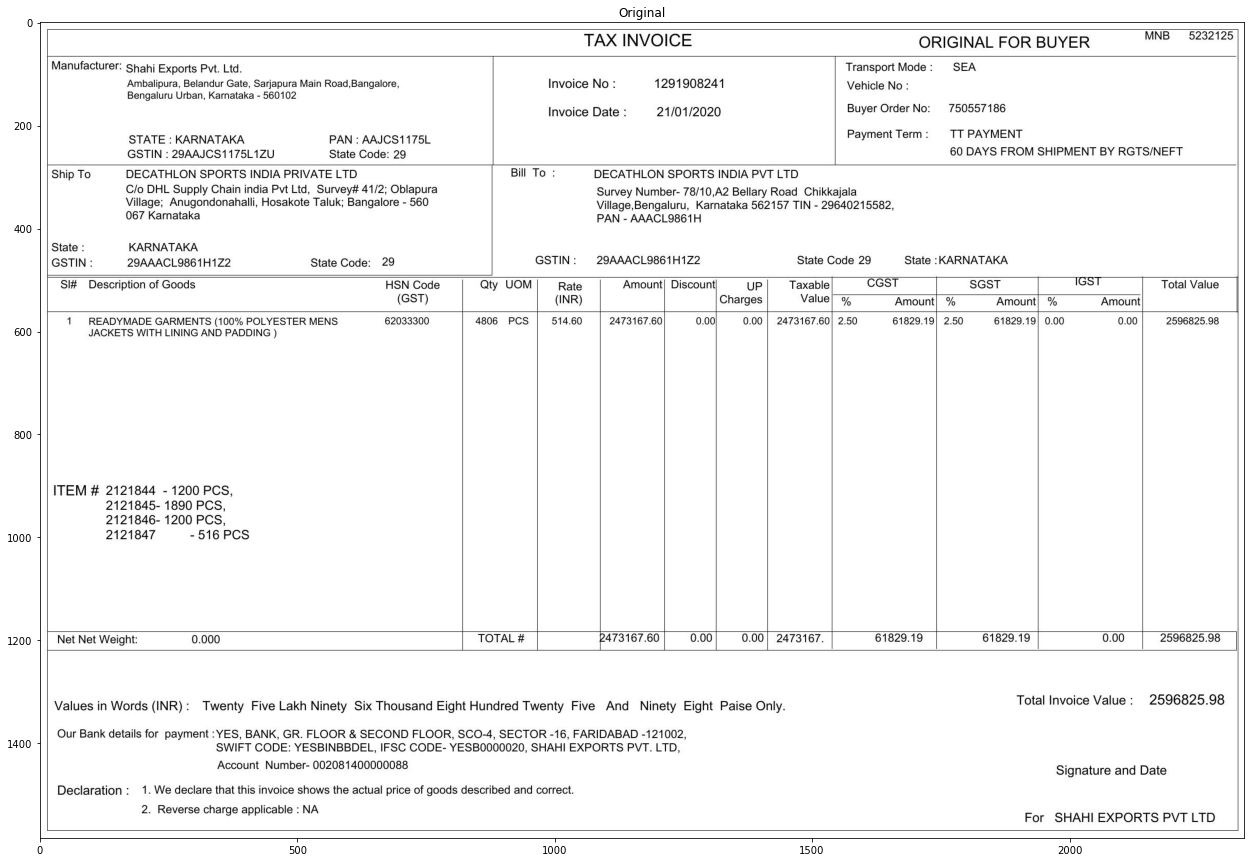

In [65]:
plot_image(img)

In [66]:
image_string = pytesseract.image_to_string(img)
print(image_string)

TAX INVOICE ORIGINAL FOR BUYER WB: “5232125
Manufacturer: Shahi Exports Pvt. Ltd. Transport Mode: SEA
Ambalipura, Belandur Gate, Sarjapura Main Road,Bangalore, Invoice No: 1291908241 Vehicle No :
Bengaluru Urban, Karnataka - 560102
Invoice Date : 21/01/2020 Buyer Order No: 750557186
STATE : KARNATAKA PAN : AAJCS1175L Payment Tem: “TT PAYMENT
GSTIN : 29AAJCS1175L1ZU State Code: 29 60 DAYS FROM SHIPMENT BY RGTS/NEFT
Ship To DECATHLON SPORTS INDIA PRIVATE LTD Bill To : DECATHLON SPORTS INDIA PVT LTD
C/o DHL Supply Chain india Pvt Ltd, Survey# 41/2; Oblapura Survey Number- 78/10,A2 Bellary Road Chikkajala
Village; Anugondonahalli, Hosakote Taluk; Bangalore - 560 Village,Bengaluru, Karnataka 562157 TIN - 29640215582,
067 Karnataka PAN - AAACL9861H
State : KARNATAKA
GSTIN: 29AAACL9861H1Z2 State Code: 29 GSTIN: | 29AAACL9861H1Z2 State Code 29 State :KARNATAKA
Sl# Description of Goods HSN Code Qty UOM Rate Amount] Discount| UP Taxable CGST SGST IGST Total Value
(GST) (INR) Charges Value) % Amo

In [67]:
image_string = image_string.lower()

In [68]:
text = image_string

In [69]:
def pattern_extractor(expression):
    pattern = re.compile(expression)
    matches = pattern.finditer(text)
    print(matches)
    for match in matches:
        print(match)

In [70]:
pattern_extractor(r'(?<=invoice no) {,3}[:] {,3}[0-9a-z/]{1,}')

<re.Match object; span=(170, 182), match=': 1291908241'>


In [71]:
pattern_extractor(r'(?<=invoice date)|(?<=invoice date and time) {,3}[:-] {,3}[0-9a-z/]')

<re.Match object; span=(244, 244), match=''>


In [72]:
pattern_extractor('invoice date {,3}[:-] {,3}[0-9/]*|invoice date and time {,3}[:-] {,3}[0-9/]*')

<re.Match object; span=(232, 257), match='invoice date : 21/01/2020'>


In [73]:
pattern_extractor('(?<=invoice date [(and)&] time)|(?<=invoice date)')

<re.Match object; span=(244, 244), match=''>


In [74]:
image_string.find('invoice no')

160

In [75]:
image_string[160:]

'invoice no: 1291908241 vehicle no :\nbengaluru urban, karnataka - 560102\ninvoice date : 21/01/2020 buyer order no: 750557186\nstate : karnataka pan : aajcs1175l payment tem: “tt payment\ngstin : 29aajcs1175l1zu state code: 29 60 days from shipment by rgts/neft\nship to decathlon sports india private ltd bill to : decathlon sports india pvt ltd\nc/o dhl supply chain india pvt ltd, survey# 41/2; oblapura survey number- 78/10,a2 bellary road chikkajala\nvillage; anugondonahalli, hosakote taluk; bangalore - 560 village,bengaluru, karnataka 562157 tin - 29640215582,\n067 karnataka pan - aaacl9861h\nstate : karnataka\ngstin: 29aaacl9861h1z2 state code: 29 gstin: | 29aaacl9861h1z2 state code 29 state :karnataka\nsl# description of goods hsn code qty uom rate amount] discount| up taxable cgst sgst igst total value\n(gst) (inr) charges value) % amount] % amount] % amount\n1 readymade garments (100% polyester mens 62033300 4806 pcs 514.60 2473167.60 0.00} 0.00 | 2473167.60) 2.50 61829.19| 2.50

In [76]:
print(pytesseract.image_to_alto_xml(img))

b'<?xml version="1.0" encoding="UTF-8"?>\n<alto xmlns="http://www.loc.gov/standards/alto/ns-v3#" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.loc.gov/standards/alto/ns-v3# http://www.loc.gov/alto/v3/alto-3-0.xsd">\n\t<Description>\n\t\t<MeasurementUnit>pixel</MeasurementUnit>\n\t\t<sourceImageInformation>\n\t\t\t<fileName>C:\\Users\\HP\\AppData\\Local\\Temp\\tess_a_dk6f75.PNG</fileName>\n\t\t</sourceImageInformation>\n\t\t<OCRProcessing ID="OCR_0">\n\t\t\t<ocrProcessingStep>\n\t\t\t\t<processingSoftware>\n\t\t\t\t\t<softwareName>tesseract v5.0.1.20220118</softwareName>\n\t\t\t\t</processingSoftware>\n\t\t\t</ocrProcessingStep>\n\t\t</OCRProcessing>\n\t</Description>\n\t<Layout>\n\t\t<Page WIDTH="2339" HEIGHT="1584" PHYSICAL_IMG_NR="0" ID="page_0">\n\t\t\t<PrintSpace HPOS="0" VPOS="0" WIDTH="2339" HEIGHT="1584">\n\t\t\t\t<GraphicalElement ID="cblock_0" HPOS="14" VPOS="1" WIDTH="2312" HEIGHT="27"></Graphic

In [77]:
data=pytesseract.image_to_data(img, output_type=Output.DICT)

In [78]:
data.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [79]:
data['text']

['',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 'TAX',
 'INVOICE',
 'ORIGINAL',
 'FOR',
 'BUYER',
 'WB:',
 '“5232125',
 '',
 'Manufacturer:',
 'Shahi',
 'Exports',
 'Pvt.',
 'Ltd.',
 'Transport',
 'Mode:',
 'SEA',
 '',
 'Ambalipura,',
 'Belandur',
 'Gate,',
 'Sarjapura',
 'Main',
 'Road,Bangalore,',
 'Invoice',
 'No:',
 '1291908241',
 'Vehicle',
 'No',
 ':',
 '',
 'Bengaluru',
 'Urban,',
 'Karnataka',
 '-',
 '560102',
 '',
 'Invoice',
 'Date',
 ':',
 '21/01/2020',
 'Buyer',
 'Order',
 'No:',
 '750557186',
 '',
 'STATE',
 ':',
 'KARNATAKA'

In [80]:
data_df = pd.DataFrame(data)
data_df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,2339,1584,-1,
1,2,1,1,0,0,0,14,1,2312,27,-1,
2,3,1,1,1,0,0,14,1,2312,27,-1,
3,4,1,1,1,1,0,14,1,2312,27,-1,
4,5,1,1,1,1,1,14,1,2312,27,95.000000,


In [81]:
clean_df = data_df[~((data_df['text'] == '') | (data_df['text'] == ' ') | (data_df['text'] == ':'))]

In [82]:
clean_df.reset_index(inplace= True)

In [83]:
clean_df.drop('index', inplace= True, axis = 1)

C:\Users\HP\AppData\Local\Temp/ipykernel_11632/1619329374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop('index', inplace= True, axis = 1)


In [84]:
clean_df['text'] = clean_df['text'].map(lambda x: x.lower())

C:\Users\HP\AppData\Local\Temp/ipykernel_11632/2487650934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text'] = clean_df['text'].map(lambda x: x.lower())


In [85]:
clean_df.iloc[21]

level                5
page_num             1
block_num           24
par_num              1
line_num             3
word_num             7
left               988
top                110
width               76
height              18
conf         95.964699
text           invoice
Name: 21, dtype: object

In [86]:
clean_df['top'].shift(1)

0         NaN
1        23.0
2        23.0
3        28.0
4        28.0
        ...  
282    1443.0
283    1535.0
284    1535.0
285    1535.0
286    1535.0
Name: top, Length: 287, dtype: float64

In [87]:
clean_df['vertical_gap']=clean_df['top']+clean_df['height']- (clean_df['top'].shift(1)+clean_df['height'].shift(1))

C:\Users\HP\AppData\Local\Temp/ipykernel_11632/3556586213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['vertical_gap']=clean_df['top']+clean_df['height']- (clean_df['top'].shift(1)+clean_df['height'].shift(1))


In [88]:
clean_df['horizontal_gap'] = clean_df['left'] - (clean_df['left'].shift(1)+clean_df['width'].shift(1, ))

C:\Users\HP\AppData\Local\Temp/ipykernel_11632/3656322888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['horizontal_gap'] = clean_df['left'] - (clean_df['left'].shift(1)+clean_df['width'].shift(1, ))


In [89]:
clean_df['X_2'] = clean_df['left']+clean_df['width']
clean_df['Y_2'] = clean_df['top']+clean_df['height']

C:\Users\HP\AppData\Local\Temp/ipykernel_11632/2206179724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['X_2'] = clean_df['left']+clean_df['width']
C:\Users\HP\AppData\Local\Temp/ipykernel_11632/2206179724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Y_2'] = clean_df['top']+clean_df['height']


In [90]:
clean_df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,vertical_gap,horizontal_gap,X_2,Y_2
0,5,1,24,1,1,1,1056,23,64,24,95.966629,tax,NaN,NaN,1120,47
1,5,1,24,1,1,2,1133,23,132,24,95.966629,invoice,0.0,13.0,1265,47
2,5,1,24,1,1,3,1707,28,143,22,96.330345,original,3.0,442.0,1850,50
3,5,1,24,1,1,4,1862,28,62,22,96.913445,for,0.0,12.0,1924,50
4,5,1,24,1,1,5,1935,28,103,22,96.324173,buyer,0.0,11.0,2038,50


<AxesSubplot:ylabel='horizontal_gap'>

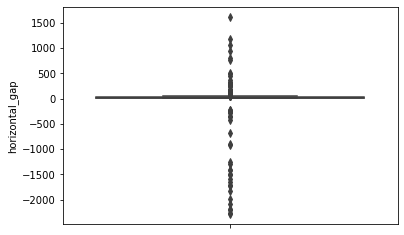

In [91]:
sns.boxplot(data = clean_df, y = 'horizontal_gap')

In [92]:
clean_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level,287.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
page_num,287.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
block_num,287.0,24.801394,1.661661,24.0,24.0,24.0,25.0,31.0
par_num,287.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
line_num,287.0,9.041812,7.036244,1.0,2.0,8.0,15.0,23.0
word_num,287.0,6.749129,4.672467,1.0,3.0,6.0,10.0,22.0
left,287.0,897.634146,643.895744,23.0,318.0,726.0,1424.5,2236.0
top,287.0,720.829268,503.199076,18.0,316.0,534.0,1318.0,1535.0
width,287.0,66.540070,36.733747,4.0,41.5,58.0,86.0,200.0
height,287.0,17.275261,3.698069,2.0,16.0,16.0,18.0,33.0


In [93]:
def conditions(X,Y,W,H):
    # right side
    top_condition = (clean_df['top'] >= (Y-5))
    left_condition = (clean_df['left'] >= (X+W))
    right_condition = (clean_df['left'] <= (X+W+80))
    bottom_condition = (clean_df['top'] <= (Y+(H/2)))

    row_condition = (top_condition & bottom_condition & right_condition & left_condition)

    # on bottom side
    top_condition_bt = (clean_df['top'] >= (Y+H))
    left_condition_bt = (clean_df['left'] >= (X-H))
    right_condition_bt = (clean_df['left'] <= (X+W+20))
    bottom_condition_bt = (clean_df['top'] <= (Y+(2*H)))

    column_condition = (top_condition_bt & bottom_condition_bt & right_condition_bt & left_condition_bt)
    return row_condition, column_condition

In [113]:
variable = ['no', 'number']
invoice = clean_df[clean_df.text == 'invoice'].index
final_idx = []
for index in invoice:
    X, Y, W, H=clean_df.iloc[index][['left', 'top', 'width', 'height']].to_list()
    row_condition, column_condition = conditions(X,Y,W,H)

    # clean_df[((980 <= clean_df['left']) & (clean_df['left'] <= (X+W+20))) & (clean_df['width'] >=76) & (clean_df['top'] >= Y)]
    no_df = clean_df[(row_condition | column_condition)]

    # if no_df.shape[0] == 1 and (clean_df.text[no_df.index].values in ['no:', 'no', 'number']):
    #     print(index, no_df.index)
    for obs in no_df.index:
        re_exp = variable[0]+' {,3}[:-]*|'+variable[1]+' {,2}[:-]*'
        if re.match(re_exp,clean_df.text[obs]):
        # if clean_df.text[obs] in ['date:', 'date']:
            print(clean_df.text[obs])
            no_idx = obs
            final_idx = [index, obs]
            break
    # if final_idx is not None:
    #     break
    print('u')

new_df = clean_df.iloc[final_idx]
X, Y, W, H =new_df.left.min(), new_df.top.min(), new_df.X_2.max()-new_df.left.min(), new_df.Y_2.max()-new_df.top.min()
right_condition, bottom_condition = conditions(X,Y,W,H)
no_df = clean_df[right_condition | bottom_condition]

target = no_df.text


    

    # if clean_df.text[index] == 'invoice' and clean_df.text[index+1] in ['no:', 'no :']:
    #     print(index)

u
no:
u
u
u
u


In [114]:
final_idx

[21, 22]

In [115]:
target

23    1291908241
Name: text, dtype: object

In [52]:
clean_df.iloc[final_idx]['height'].value_counts().index.shape[0] == 1

True

In [97]:
new_df = clean_df.iloc[final_idx]
new_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,vertical_gap,horizontal_gap,X_2,Y_2
31,5,1,24,1,5,1,988,165,76,18,96.947563,invoice,34.0,491.0,1064,183
32,5,1,24,1,5,2,1074,165,50,18,93.210594,date,0.0,10.0,1124,183


In [98]:
X, Y, W, H =new_df.left.min(), new_df.top.min(), new_df.X_2.max()-new_df.left.min(), new_df.Y_2.max()-new_df.top.min()

In [99]:
top_condition = (clean_df['top'] >= (Y-5))
left_condition = (clean_df['left'] >= (X+W))
right_condition = (clean_df['left'] <= (X+W+20))
bottom_condition = (clean_df['top'] <= (Y+(H/2)))

row_condition = (top_condition & bottom_condition & right_condition & left_condition)

# on bottom side
top_condition_bt = (clean_df['top'] >= (Y+H))
left_condition_bt = (clean_df['left'] >= (X-H))
right_condition_bt = (clean_df['left'] <= (X+W+20))
bottom_condition_bt = (clean_df['top'] <= (Y+(2*H)))

In [100]:
X,Y,W,H

(988, 165, 136, 18)

In [101]:
right_condition, bottom_condition = conditions(X,Y,W,H)

In [102]:
clean_df[right_condition|bottom_condition]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,vertical_gap,horizontal_gap,X_2,Y_2
33,5,1,24,1,5,4,1198,165,123,18,96.443863,21/01/2020,0.0,74.0,1321,183


In [103]:
clean_df[row_condition]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,vertical_gap,horizontal_gap,X_2,Y_2


In [104]:
no_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,vertical_gap,horizontal_gap,X_2,Y_2
33,5,1,24,1,5,4,1198,165,123,18,96.443863,21/01/2020,0.0,74.0,1321,183


In [105]:
clean_df.iloc[final_idx].min()

level                     5
page_num                  1
block_num                24
par_num                   1
line_num                  5
word_num                  1
left                    988
top                     165
width                    50
height                   18
conf              93.210594
text                   date
vertical_gap            0.0
horizontal_gap         10.0
X_2                    1064
Y_2                     183
dtype: object

In [106]:
X, Y, W, H=clean_df.iloc[21][['left', 'top', 'width', 'height']].to_list()
X,Y,W,H

(988, 110, 76, 18)

In [107]:
multi=clean_df[((980 <= clean_df['left'])) & (clean_df['width'] >=76) & (clean_df['top'] >= Y)]

In [108]:
multi

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,vertical_gap,horizontal_gap,X_2,Y_2
21,5,1,24,1,3,7,988,110,76,18,95.964699,invoice,-2.0,292.0,1064,128
23,5,1,24,1,3,9,1194,110,132,18,96.744980,1291908241,0.0,78.0,1326,128
31,5,1,24,1,5,1,988,165,76,18,96.947563,invoice,34.0,491.0,1064,183
33,5,1,24,1,5,4,1198,165,123,18,96.443863,21/01/2020,0.0,74.0,1321,183
37,5,1,24,1,5,8,1765,159,109,16,44.741089,750557186,0.0,38.0,1874,175
42,5,1,24,1,6,7,1568,209,86,21,0.000000,payment,-6.0,810.0,1654,230
45,5,1,24,1,6,10,1802,209,105,16,83.120430,payment,0.0,9.0,1907,225
54,5,1,24,1,7,10,1937,243,113,16,96.257294,shipment,0.0,9.0,2050,259
56,5,1,24,1,7,12,2094,243,124,16,91.849030,rgts/neft,0.0,8.0,2218,259
66,5,1,24,1,8,11,1077,287,133,16,96.442863,decathlon,3.0,96.0,1210,303


In [112]:
txt = 'invoice'
re_str = re.escape(txt) + ' {,3}[:-]*'
re.match(re_str, 'invoice :')

<re.Match object; span=(0, 9), match='invoice :'>

In [110]:
for i in multi.index:
    if clean_df.text[i] in ['invoice']:
        print('yes', i)

yes 21
yes 31
yes 210


In [ ]:
# on left side
top_condition = (clean_df['top'] >= (Y-5))
left_condition = (clean_df['left'] >= (X+W))
right_condition = (clean_df['left'] <= (X+W+20))
bottom_condition = (clean_df['top'] <= (Y+(H/2)))

row_condition = (top_condition & bottom_condition & right_condition & left_condition)

# on bottom side
top_condition_bt = (clean_df['top'] >= (Y+H))
left_condition_bt = (clean_df['left'] >= (X-H))
right_condition_bt = (clean_df['left'] <= (X+W+20))
bottom_condition_bt = (clean_df['top'] <= (Y+(2*H)))

column_condition = (top_condition_bt & bottom_condition_bt & right_condition_bt & left_condition_bt)

# clean_df[((980 <= clean_df['left']) & (clean_df['left'] <= (X+W+20))) & (clean_df['width'] >=76) & (clean_df['top'] >= Y)]
no_df = clean_df[(row_condition | column_condition)]

In [ ]:
re.match('no {,3}[:-]*|number {,2}[:-]*',)

In [ ]:
if no_df.shape[0] == 1 and (clean_df.text[no_df.index].values in ['no:', 'no', 'number']):
    print('yrd')

In [ ]:
no_df.shape

In [ ]:
invoice_df = clean_df.iloc[21:21+3]
invoice_df

In [ ]:
clean_df.to_csv('df.csv')